In [2]:
import networkx as nx
import random
from pyvis.network import Network
import matplotlib.pyplot as plt
%matplotlib inline

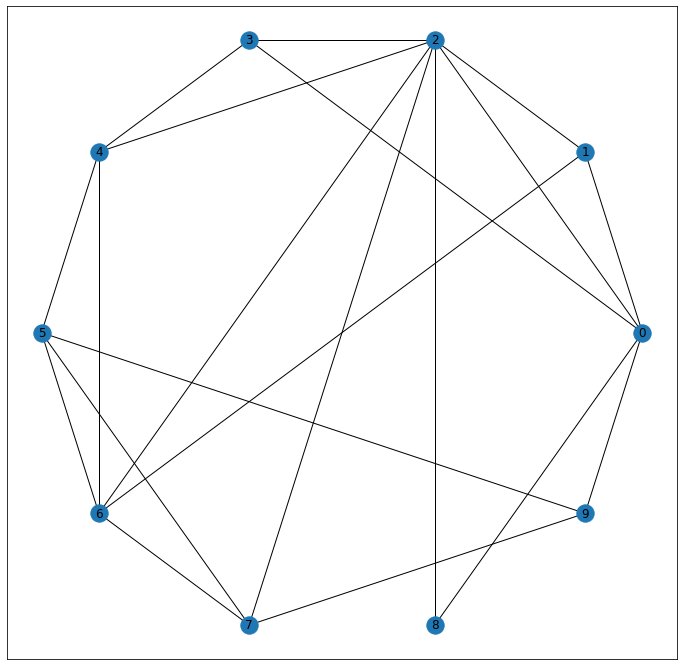

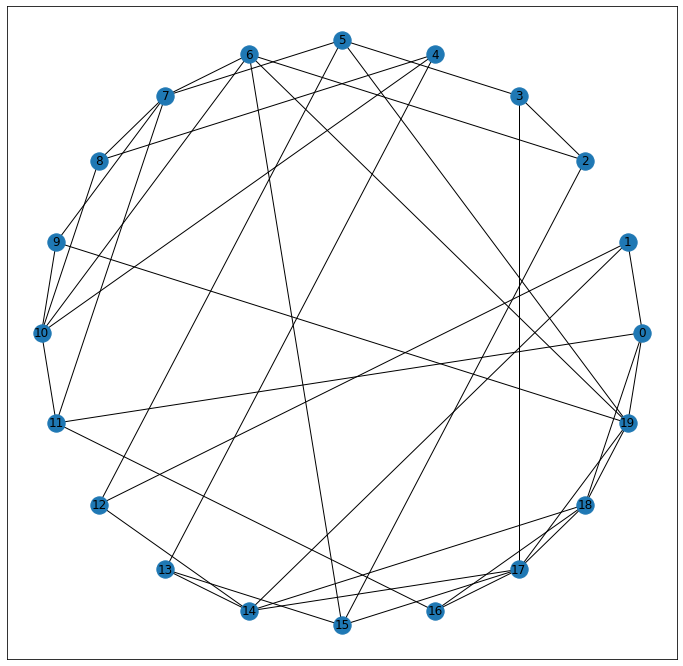

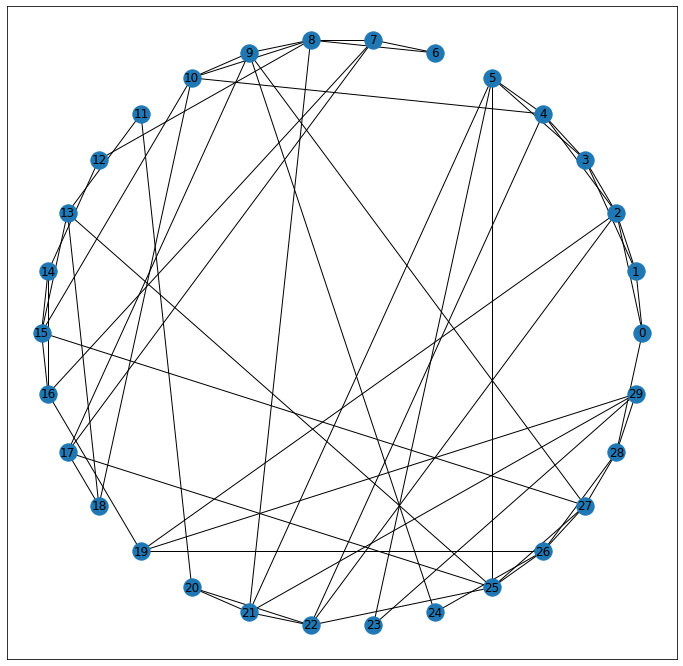

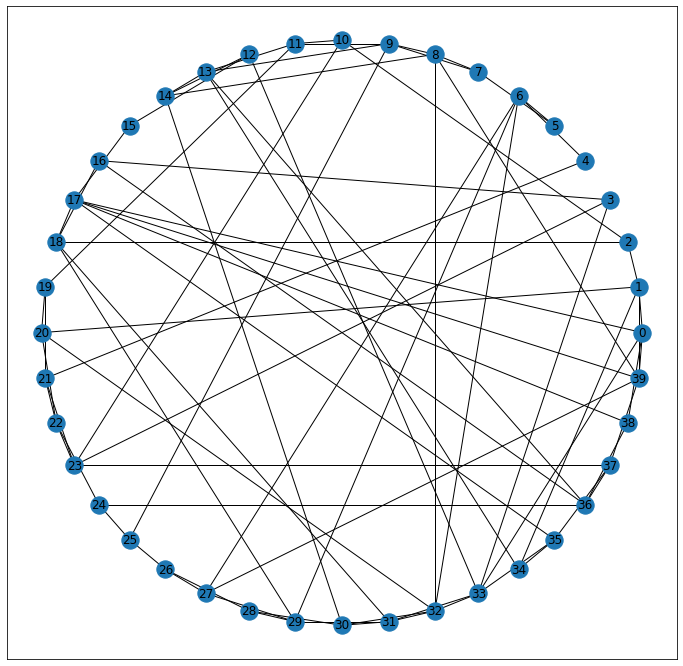

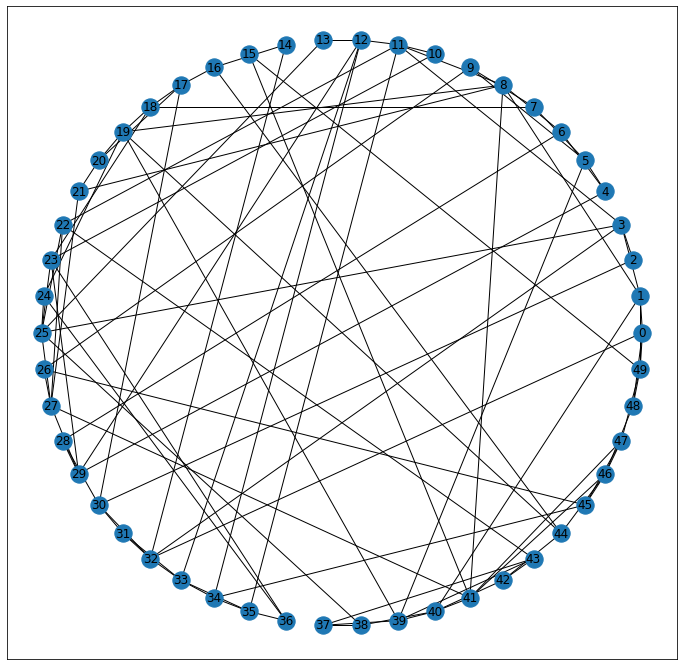

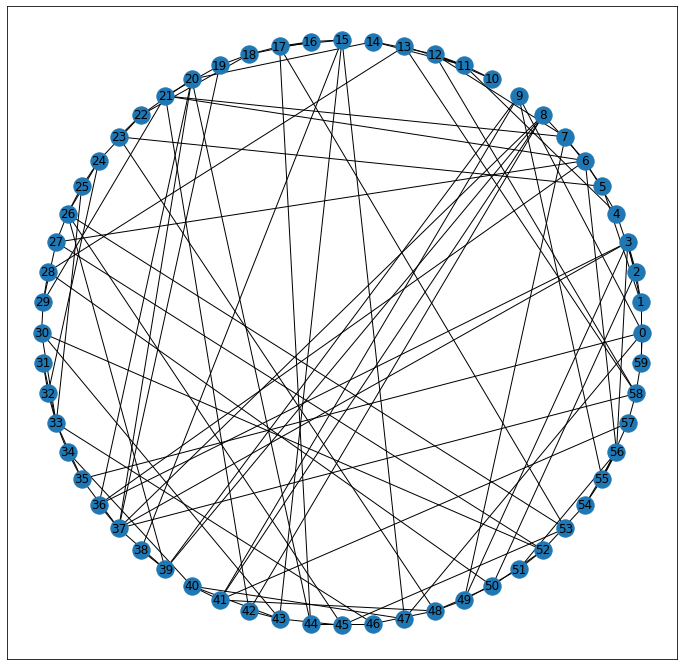

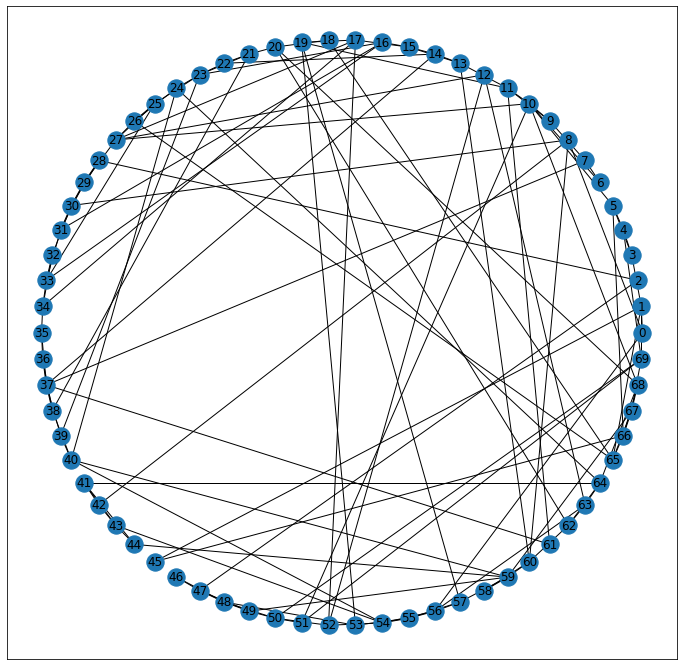

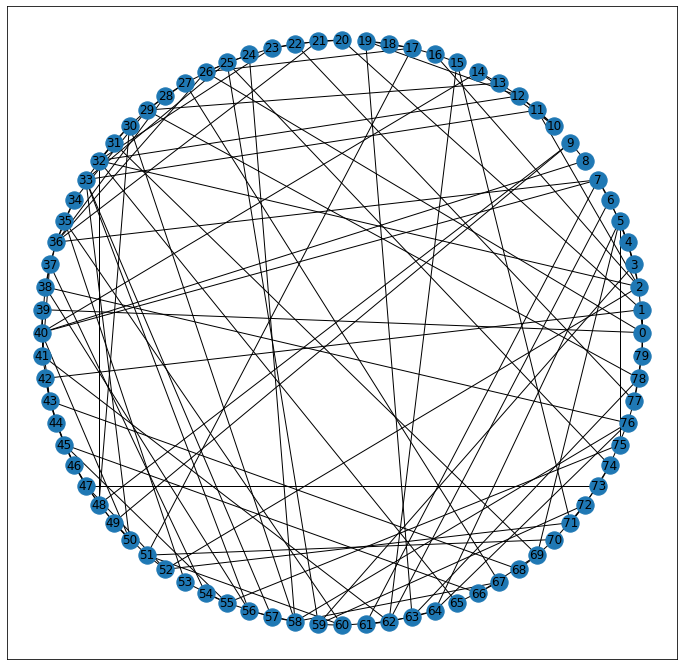

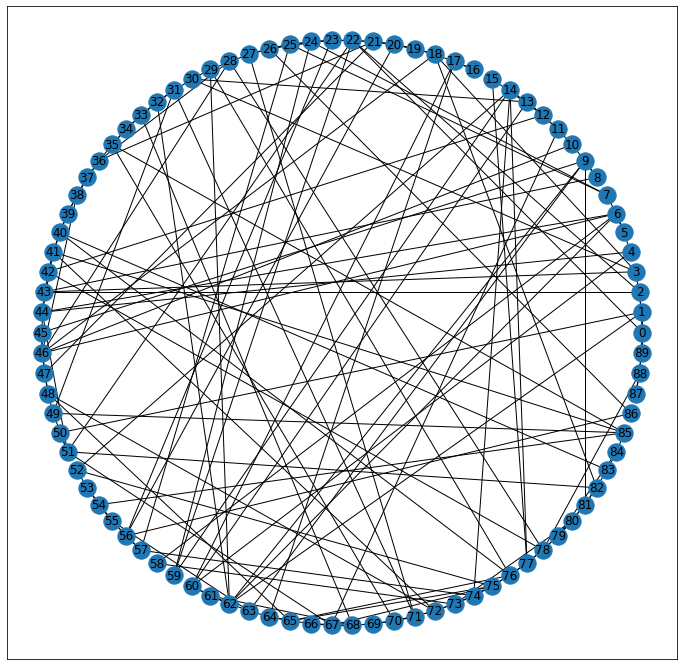

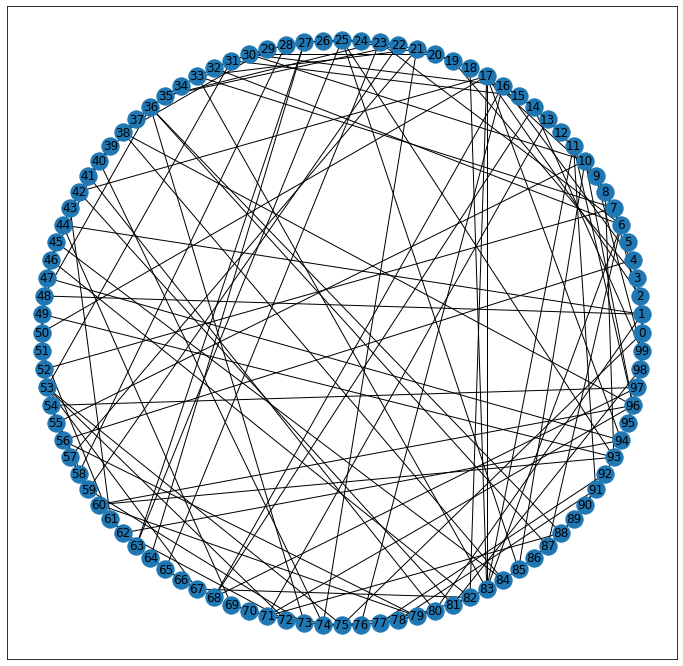

In [17]:
# пункт 1
# последовательные графы в выводе данной ячейки

nodes = []
diametrs = []

for i in range(10, 101):
    G = nx.watts_strogatz_graph(n = i, k = 4, p = 0.5)
    nodes.append(i)
    diametrs.append(nx.diameter(G))
    if i % 10 == 0:
        pos = nx.circular_layout(G)
        plt.figure(figsize = (12, 12))
        nx.draw_networkx(G, pos)

In [6]:
attrs = {}
for i in range(len(G.nodes(data=True))):
    attrs[i] = {"weight": random.randint(0,7)}
nx.set_node_attributes(G, attrs)

Text(0, 0.5, 'Value')

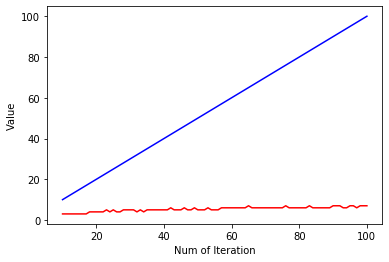

In [8]:
plt.plot(range(10,101), diametrs, color='red')
plt.plot(range(10, 101), nodes, color="blue")
plt.xlabel("Num of Iteration")
plt.ylabel("Value")

In [10]:
print("final diameter: "+ str(diametrs[-1]))

final diameter: 7


In [11]:
# пункт 2

def destroy(graph, fisrt=False):
    if nx.is_empty(graph):
        return
    critical_nodes = []
    for node in graph.nodes(data='weight'):
        if node[1] >= 10:
            critical_nodes.append(node[0])
    neighbours = [[] for i in range(len(critical_nodes))]
    for edge in graph.edges():
        for i in range(len(critical_nodes)):
            if critical_nodes[i] == edge[0]:
                neighbours[i].append(edge[1])
            if critical_nodes[i] == edge[1]:
                neighbours[i].append(edge[0])
    for node in critical_nodes:
        graph.remove_node(node)
        for i in range(len(neighbours)):
            try:
                neighbours[i].remove(node)
            except:
                pass
    for i in range(len(neighbours)):
        try:
            increment = 10/len(neighbours[i])
        except ZeroDivisionError:
            pass
        for node in neighbours[i]:
            graph.nodes[node]['weight'] += increment
    nodes = list(graph.nodes(data="weight"))
    for node in nodes:
        if node[1] >= 10:
            destroy(graph)

In [13]:
critical_nodes = [random.randint(0,99) for i in range(10)]
for node in critical_nodes:
    G.nodes[node]['weight'] = 10
counter = 0
destroys = []
if nx.is_connected(G):
    diameters = [nx.diameter(G)]
else:
    diameters = [0]
while len(G) > 1:
    if nx.is_connected(G):
        critical_nodes = []
        for node in G.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(G) - 1)
            G.nodes[list(G.nodes)[rand]]['weight'] = 10
        destroy(G)
    else:
        S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
        G = max(S, key=len)
        critical_nodes = []
        for node in G.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(G) - 1)
            G.nodes[list(G.nodes)[rand]]['weight'] = 10
        destroy(G)
        destroys.append(counter)
    counter += 1
    try:
        diameters.append(nx.diameter(G))
    except:
        diameters.append(0)
counters = [i for i in range(counter+1)]
x = [0 for i in range(len(destroys))]

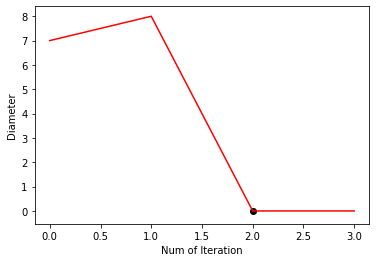

In [14]:
plt.plot(counters, diameters, color='red')
plt.xlabel("Num of Iteration")
plt.ylabel("Diameter")
plt.scatter(destroys, x, color='black')

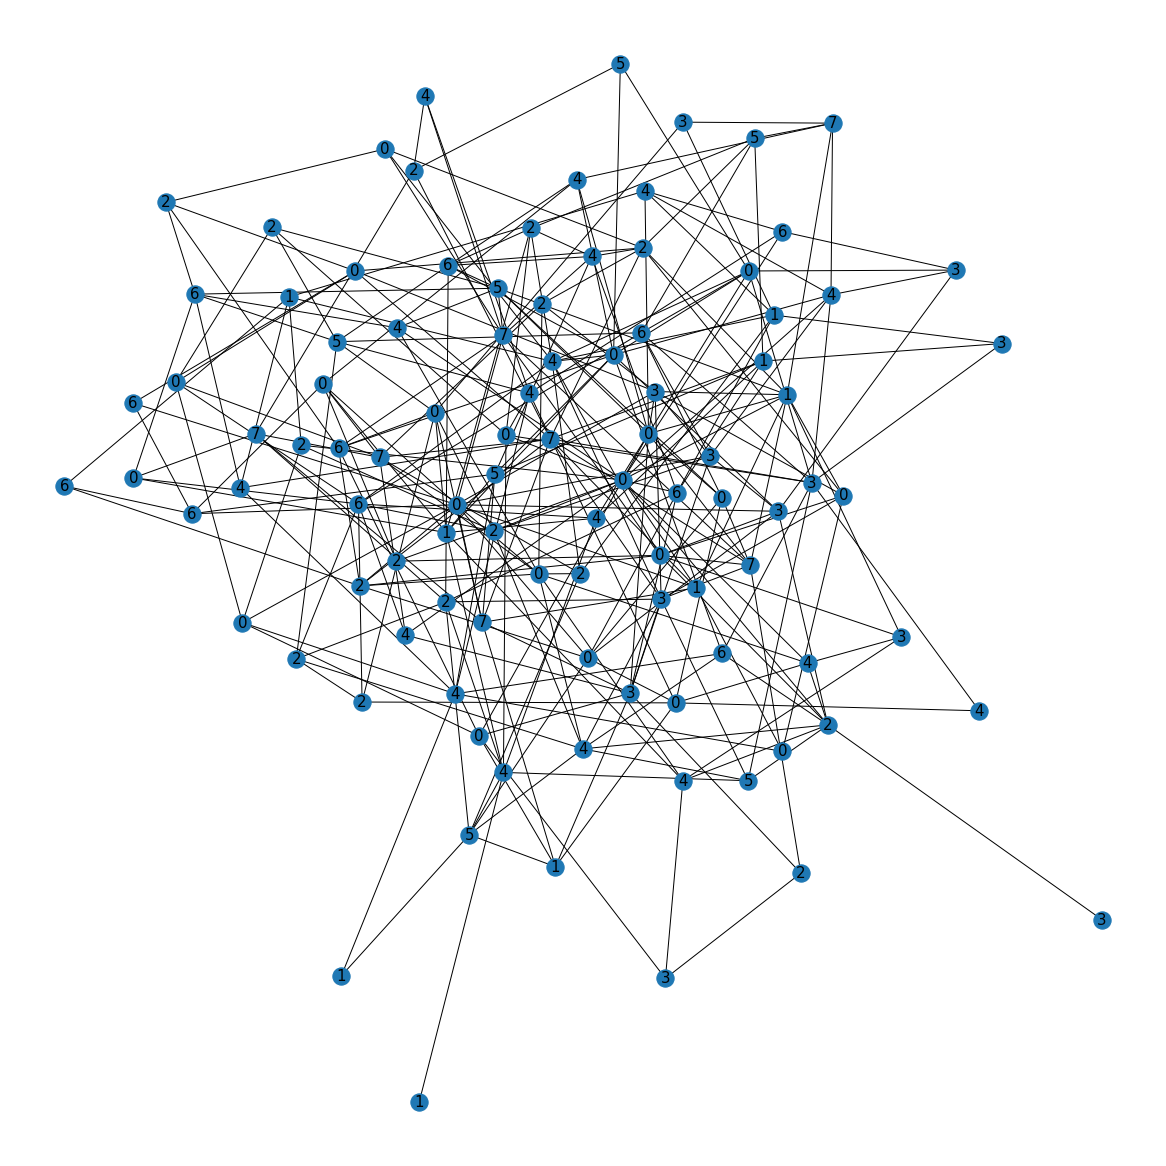

In [18]:
# пункт 3
# случайный граф

random_G = nx.gnm_random_graph(100, 300)

attrs = {}
for i in range(len(random_G.nodes(data=True))):
    attrs[i] = {"weight": random.randint(0,7)}
nx.set_node_attributes(random_G, attrs)

plt.figure(3,figsize=(16,16)) 
pos = nx.spring_layout(random_G)

nx.draw(random_G, pos)

_labels = nx.get_node_attributes(random_G,'weight')
nx.draw_networkx_labels(random_G, pos, labels = _labels, font_size = 15)


plt.show()

In [19]:
critical_nodes = [random.randint(0,99) for i in range(10)]
for node in critical_nodes:
    random_G.nodes[node]['weight'] = 10
counter = 0
destroys = []
if nx.is_connected(random_G):
    diameters = [nx.diameter(random_G)]
else:
    diameters = [0]
while len(random_G) > 1:
    if nx.is_connected(random_G):
        critical_nodes = []
        for node in random_G.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(random_G) - 1)
            random_G.nodes[list(random_G.nodes)[rand]]['weight'] = 10
        destroy(random_G)
    else:
        S = [random_G.subgraph(c).copy() for c in nx.connected_components(random_G)]
        random_G = max(S, key=len)
        critical_nodes = []
        for node in random_G.nodes(data='weight'):
            if node[1] >= 10:
                critical_nodes.append(node[0])
        if len(critical_nodes) < 1:
            rand = random.randint(0, len(random_G) - 1)
            random_G.nodes[list(random_G.nodes)[rand]]['weight'] = 10
        destroy(random_G)
        destroys.append(counter)
    counter += 1
    try:
        diameters.append(nx.diameter(random_G))
    except:
        diameters.append(0)
counters = [i for i in range(counter+1)]
x = [0 for i in range(len(destroys))]

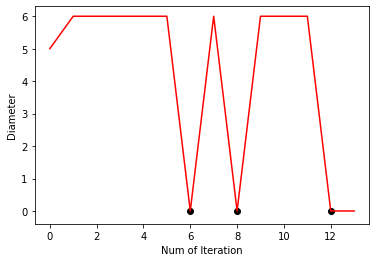

In [20]:
plt.plot(counters, diameters, color='red')
plt.xlabel("Num of Iteration")
plt.ylabel("Diameter")
plt.scatter(destroys, x, color='black')

Сравнение разурешние малого мира и случайного графа: можно заметить, что случайному графу с таким же количеством вершин и таким же предельным весом необходимо гораздо больше итераций для окончательного разрушения, а также гораздо больше разрушений происходит во время этих итераций. Так, на графике разрушения малого мира видно только 1 разрушение уже во время 2 прохода цикла, а на графике разрушения случайного графа их 3 и они во второй половине итераций разрушения.